In [ ]:
#https://github.com/Teichlab/cellphonedb/blob/master/cellphonedb/src/plotters/R/plot_dot_by_column_name.R

In [1]:
library(ggplot2)
library(dplyr)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
path <- '/home/jovyan/mounting_point/cellphoneDB_output/out_allmono_platelet_bothwave_allcase_new/'

In [3]:
all_pval = read.table(paste0(path,'pvalues.txt'), header=T, stringsAsFactors = F, sep='\t')
all_means = read.table(paste0(path,'means.txt'), header=T, stringsAsFactors = F, sep='\t')

In [4]:
head(all_pval)

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,⋯,Int.mono.Int.mono,Int.mono.Platelet,Platelet.CD14mono,Platelet.CD14mono_IFN,Platelet.CD14mono_alt_act,Platelet.CD16mono,Platelet.CD16mono_C1,Platelet.CD16mono_IFN,Platelet.Int.mono,Platelet.Platelet
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,⋯,1,1,1,1,1,1,1,1,1,1
2,CPI-CS047D9C0D7,LeukotrieneB4_byLTA4H_LTB4R,complex:LeukotrieneB4_byLTA4H,simple:Q15722,,LTB4R,True,False,True,curated,⋯,1,1,1,1,1,1,1,1,1,1
3,CPI-CS04A56D5BE,12oxoLeukotrieneB4_byPTGR1_LTB4R2,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q9NPC1,,LTB4R2,True,False,True,curated,⋯,1,1,1,1,1,1,1,1,1,1
4,CPI-CS0F5B070C5,LeukotrieneB4_byLTA4H_LTB4R2,complex:LeukotrieneB4_byLTA4H,simple:Q9NPC1,,LTB4R2,True,False,True,curated,⋯,1,1,1,1,1,1,1,1,1,1
5,CPI-CS0AFE4D0CB,LeukotrieneB4_byLTA4H_GPR17,complex:LeukotrieneB4_byLTA4H,simple:Q13304,,GPR17,True,False,True,curated,⋯,1,1,1,1,1,1,1,1,1,1
6,CPI-CS00DCACEEE,LeukotrieneC4_byLTC4S_GPR17,complex:LeukotrieneC4_byLTC4S,simple:Q13304,,GPR17,True,False,True,curated,⋯,1,1,1,1,1,1,1,1,1,1


In [5]:
head(all_means)

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,⋯,Int.mono.Int.mono,Int.mono.Platelet,Platelet.CD14mono,Platelet.CD14mono_IFN,Platelet.CD14mono_alt_act,Platelet.CD16mono,Platelet.CD16mono_C1,Platelet.CD16mono_IFN,Platelet.Int.mono,Platelet.Platelet
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CPI-CS0A5B6BD7A,12oxoLeukotrieneB4_byPTGR1_LTB4R,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q15722,,LTB4R,True,False,True,curated,⋯,0.032,0.012,0.082,0.085,0.102,0.014,0.033,0.021,0.032,0.012
2,CPI-CS047D9C0D7,LeukotrieneB4_byLTA4H_LTB4R,complex:LeukotrieneB4_byLTA4H,simple:Q15722,,LTB4R,True,False,True,curated,⋯,0.444,0.424,0.149,0.152,0.169,0.081,0.100,0.088,0.099,0.079
3,CPI-CS04A56D5BE,12oxoLeukotrieneB4_byPTGR1_LTB4R2,complex:12oxoLeukotrieneB4_byPTGR1,simple:Q9NPC1,,LTB4R2,True,False,True,curated,⋯,0.012,0.006,0.014,0.016,0.017,0.009,0.010,0.007,0.011,0.006
4,CPI-CS0F5B070C5,LeukotrieneB4_byLTA4H_LTB4R2,complex:LeukotrieneB4_byLTA4H,simple:Q9NPC1,,LTB4R2,True,False,True,curated,⋯,0.424,0.418,0.082,0.084,0.084,0.076,0.077,0.074,0.079,0.073
5,CPI-CS0AFE4D0CB,LeukotrieneB4_byLTA4H_GPR17,complex:LeukotrieneB4_byLTA4H,simple:Q13304,,GPR17,True,False,True,curated,⋯,0.000,0.413,0.000,0.000,0.000,0.000,0.000,0.069,0.000,0.068
6,CPI-CS00DCACEEE,LeukotrieneC4_byLTC4S_GPR17,complex:LeukotrieneC4_byLTC4S,simple:Q13304,,GPR17,True,False,True,curated,⋯,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.008


In [6]:
selected_rows = NULL
selected_columns = NULL
intr_pairs = all_pval$interacting_pair
intr_pairs

[1] "12oxoLeukotrieneB4_byPTGR1_LTB4R"             
   [2] "LeukotrieneB4_byLTA4H_LTB4R"                  
   [3] "12oxoLeukotrieneB4_byPTGR1_LTB4R2"            
   [4] "LeukotrieneB4_byLTA4H_LTB4R2"                 
   [5] "LeukotrieneB4_byLTA4H_GPR17"                  
   [6] "LeukotrieneC4_byLTC4S_GPR17"                  
   [7] "LeukotrieneD4_byGGT1_GPR17"                   
   [8] "LeukotrieneC4_byLTC4S_CYSLTR2"                
   [9] "LeukotrieneD4_byGGT1_CYSLTR2"                 
  [10] "LeukotrieneC4_byLTC4S_CYSLTR1"                
  [11] "LeukotrieneD4_byGGT1_CYSLTR1"                 
  [12] "LeukotrieneE4_byDPEP2_CYSLTR1"                
  [13] "LeukotrieneE4_byDPEP3_CYSLTR1"                
  [14] "LipoxinA4_byALOX12_CYSLTR1"                   
  [15] "LipoxinA4_byALOX5_CYSLTR1"                    
  [16] "2arachidonoylglycerol_byDAGLA_CNR1"           
  [17] "2arachidonoylglycerol_byDAGLB_CNR1"           
  [18] "2arachidonoylglycerol_byDAGLA_CNR2"           
  [19] "2arachidonoylglycerol_byDAGLB_CNR2"           
  [20] "CCL4_CNR2"                                    
  [21] "2arachidonoylglycerol_byDAGLA_GPR55"          
  [22] "2arachidonoylglycerol_byDAGLB_GPR55"          
  [23] "CCL4_CCR8"                                    
  [24] "SPP1_CCR8"                                    
  [25] "CCL1_CCR8"                                    
  [26] "CCL4_GPR152"                                  
  [27] "BDNF_GPR152"                                  
  [28] "CCL4L2_GPR152"                                
  [29] "CCL4_SLC7A1"                                  
  [30] "CSF1_SLC7A1"                                  
  [31] "CCL4_CCR5"                                    
  [32] "CCL3_CCR5"                                    
  [33] "CCL5_CCR5"                                    
  [34] "CCL4_GPRC5D"                                  
  [35] "CCL3_CCR1"                                    
  [36] "CCL5_CCR1"                                    
  [37] "CCL3L1_CCR1"                                  
  [38] "CCL3L1_CCR1"                                  
  [39] "CCL24_CCR2"                                   
  [40] "CCL2_CCR2"                                    
  [41] "SPP1_integrin_aVb3_complex"                   
  [42] "FN1_integrin_aVb3_complex"                    
  [43] "LAMC1_integrin_aVb3_complex"                  
  [44] "F2_integrin_aVb3_complex"                     
  [45] "VTN_integrin_aVb3_complex"                    
  [46] "THBS1_integrin_aVb3_complex"                  
  [47] "L1CAM_integrin_aVb3_complex"                  
  [48] "FCER2_integrin_aVb3_complex"                  
  [49] "FGF2_integrin_aVb3_complex"                   
  [50] "VWF_integrin_aVb3_complex"                    
  [51] "IGF1_integrin_aVb3_complex"                   
  [52] "MMP2_integrin_aVb3_complex"                   
  [53] "PLAUR_integrin_aVb3_complex"                  
  [54] "OMD_integrin_aVb3_complex"                    
  [55] "SPP1_integrin_a4b1_complex"                   
  [56] "FN1_integrin_a4b1_complex"                    
  [57] "PLAUR_integrin_a4b1_complex"                  
  [58] "VCAM1_integrin_a4b1_complex"                  
  [59] "JAM2_integrin_a4b1_complex"                   
  [60] "SPP1_CD44"                                    
  [61] "LGALS9_CD44"                                  
  [62] "FGF2_CD44"                                    
  [63] "TYROBP_CD44"                                  
  [64] "HGF_CD44"                                     
  [65] "SPP1_PTGER4"                                  
  [66] "SPP1_integrin_a9b1_complex"                   
  [67] "L1CAM_integrin_a9b1_complex"                  
  [68] "VCAM1_integrin_a9b1_complex"                  
  [69] "HLA-A_KIR3DL1"                                
  [70] "HLA-F_KIR3DL1"                                
  [71] "HLA-C_KIR2DL3"                                
  [72] "CCL4L2_VSIR"                                  
  [73] "TNF_VSIR"                          

In [7]:
all_pval = all_pval[,-c(1:11)]
all_means = all_means[,-c(1:11)]

if(is.null(selected_rows)){
    selected_rows = intr_pairs
    }

In [8]:
length(intr_pairs)

[1] 1319

In [9]:
length(selected_rows)

[1] 1319

In [10]:
if(is.null(selected_columns)){
    selected_columns = colnames(all_pval)
  }

In [11]:
sel_pval = all_pval[match(selected_rows, intr_pairs), selected_columns]
sel_means = all_means[match(selected_rows, intr_pairs), selected_columns]



In [12]:
selected_rows

[1] "12oxoLeukotrieneB4_byPTGR1_LTB4R"             
   [2] "LeukotrieneB4_byLTA4H_LTB4R"                  
   [3] "12oxoLeukotrieneB4_byPTGR1_LTB4R2"            
   [4] "LeukotrieneB4_byLTA4H_LTB4R2"                 
   [5] "LeukotrieneB4_byLTA4H_GPR17"                  
   [6] "LeukotrieneC4_byLTC4S_GPR17"                  
   [7] "LeukotrieneD4_byGGT1_GPR17"                   
   [8] "LeukotrieneC4_byLTC4S_CYSLTR2"                
   [9] "LeukotrieneD4_byGGT1_CYSLTR2"                 
  [10] "LeukotrieneC4_byLTC4S_CYSLTR1"                
  [11] "LeukotrieneD4_byGGT1_CYSLTR1"                 
  [12] "LeukotrieneE4_byDPEP2_CYSLTR1"                
  [13] "LeukotrieneE4_byDPEP3_CYSLTR1"                
  [14] "LipoxinA4_byALOX12_CYSLTR1"                   
  [15] "LipoxinA4_byALOX5_CYSLTR1"                    
  [16] "2arachidonoylglycerol_byDAGLA_CNR1"           
  [17] "2arachidonoylglycerol_byDAGLB_CNR1"           
  [18] "2arachidonoylglycerol_byDAGLA_CNR2"           
  [19] "2arachidonoylglycerol_byDAGLB_CNR2"           
  [20] "CCL4_CNR2"                                    
  [21] "2arachidonoylglycerol_byDAGLA_GPR55"          
  [22] "2arachidonoylglycerol_byDAGLB_GPR55"          
  [23] "CCL4_CCR8"                                    
  [24] "SPP1_CCR8"                                    
  [25] "CCL1_CCR8"                                    
  [26] "CCL4_GPR152"                                  
  [27] "BDNF_GPR152"                                  
  [28] "CCL4L2_GPR152"                                
  [29] "CCL4_SLC7A1"                                  
  [30] "CSF1_SLC7A1"                                  
  [31] "CCL4_CCR5"                                    
  [32] "CCL3_CCR5"                                    
  [33] "CCL5_CCR5"                                    
  [34] "CCL4_GPRC5D"                                  
  [35] "CCL3_CCR1"                                    
  [36] "CCL5_CCR1"                                    
  [37] "CCL3L1_CCR1"                                  
  [38] "CCL3L1_CCR1"                                  
  [39] "CCL24_CCR2"                                   
  [40] "CCL2_CCR2"                                    
  [41] "SPP1_integrin_aVb3_complex"                   
  [42] "FN1_integrin_aVb3_complex"                    
  [43] "LAMC1_integrin_aVb3_complex"                  
  [44] "F2_integrin_aVb3_complex"                     
  [45] "VTN_integrin_aVb3_complex"                    
  [46] "THBS1_integrin_aVb3_complex"                  
  [47] "L1CAM_integrin_aVb3_complex"                  
  [48] "FCER2_integrin_aVb3_complex"                  
  [49] "FGF2_integrin_aVb3_complex"                   
  [50] "VWF_integrin_aVb3_complex"                    
  [51] "IGF1_integrin_aVb3_complex"                   
  [52] "MMP2_integrin_aVb3_complex"                   
  [53] "PLAUR_integrin_aVb3_complex"                  
  [54] "OMD_integrin_aVb3_complex"                    
  [55] "SPP1_integrin_a4b1_complex"                   
  [56] "FN1_integrin_a4b1_complex"                    
  [57] "PLAUR_integrin_a4b1_complex"                  
  [58] "VCAM1_integrin_a4b1_complex"                  
  [59] "JAM2_integrin_a4b1_complex"                   
  [60] "SPP1_CD44"                                    
  [61] "LGALS9_CD44"                                  
  [62] "FGF2_CD44"                                    
  [63] "TYROBP_CD44"                                  
  [64] "HGF_CD44"                                     
  [65] "SPP1_PTGER4"                                  
  [66] "SPP1_integrin_a9b1_complex"                   
  [67] "L1CAM_integrin_a9b1_complex"                  
  [68] "VCAM1_integrin_a9b1_complex"                  
  [69] "HLA-A_KIR3DL1"                                
  [70] "HLA-F_KIR3DL1"                                
  [71] "HLA-C_KIR2DL3"                                
  [72] "CCL4L2_VSIR"                                  
  [73] "TNF_VSIR"                          

In [13]:
selected_columns

[1] "CD14mono.CD14mono"                 "CD14mono.CD14mono_IFN"            
 [3] "CD14mono.CD14mono_alt_act"         "CD14mono.CD16mono"                
 [5] "CD14mono.CD16mono_C1"              "CD14mono.CD16mono_IFN"            
 [7] "CD14mono.Int.mono"                 "CD14mono.Platelet"                
 [9] "CD14mono_IFN.CD14mono"             "CD14mono_IFN.CD14mono_IFN"        
[11] "CD14mono_IFN.CD14mono_alt_act"     "CD14mono_IFN.CD16mono"            
[13] "CD14mono_IFN.CD16mono_C1"          "CD14mono_IFN.CD16mono_IFN"        
[15] "CD14mono_IFN.Int.mono"             "CD14mono_IFN.Platelet"            
[17] "CD14mono_alt_act.CD14mono"         "CD14mono_alt_act.CD14mono_IFN"    
[19] "CD14mono_alt_act.CD14mono_alt_act" "CD14mono_alt_act.CD16mono"        
[21] "CD14mono_alt_act.CD16mono_C1"      "CD14mono_alt_act.CD16mono_IFN"    
[23] "CD14mono_alt_act.Int.mono"         "CD14mono_alt_act.Platelet"        
[25] "CD16mono.CD14mono"                 "CD16mono.CD14mono_IFN"            
[27] "CD16mono.CD14mono_alt_act"         "CD16mono.CD16mono"                
[29] "CD16mono.CD16mono_C1"              "CD16mono.CD16mono_IFN"            
[31] "CD16mono.Int.mono"                 "CD16mono.Platelet"                
[33] "CD16mono_C1.CD14mono"              "CD16mono_C1.CD14mono_IFN"         
[35] "CD16mono_C1.CD14mono_alt_act"      "CD16mono_C1.CD16mono"             
[37] "CD16mono_C1.CD16mono_C1"           "CD16mono_C1.CD16mono_IFN"         
[39] "CD16mono_C1.Int.mono"              "CD16mono_C1.Platelet"             
[41] "CD16mono_IFN.CD14mono"             "CD16mono_IFN.CD14mono_IFN"        
[43] "CD16mono_IFN.CD14mono_alt_act"     "CD16mono_IFN.CD16mono"            
[45] "CD16mono_IFN.CD16mono_C1"          "CD16mono_IFN.CD16mono_IFN"        
[47] "CD16mono_IFN.Int.mono"             "CD16mono_IFN.Platelet"            
[49] "Int.mono.CD14mono"                 "Int.mono.CD14mono_IFN"            
[51] "Int.mono.CD14mono_alt_act"         "Int.mono.CD16mono"                
[53] "Int.mono.CD16mono_C1"              "Int.mono.CD16mono_IFN"            
[55] "Int.mono.Int.mono"                 "Int.mono.Platelet"                
[57] "Platelet.CD14mono"                 "Platelet.CD14mono_IFN"            
[59] "Platelet.CD14mono_alt_act"         "Platelet.CD16mono"                
[61] "Platelet.CD16mono_C1"              "Platelet.CD16mono_IFN"            
[63] "Platelet.Int.mono"                 "Platelet.Platelet"

In [14]:
df_names = expand.grid(selected_rows, selected_columns)
#df_names

In [15]:
dim(sel_pval)

[1] 1319   64

In [16]:
dim(sel_means)

[1] 1319   64

In [17]:
pval = unlist(sel_pval)

In [18]:
length(pval)

[1] 84416

In [19]:
#pval = unlist(sel_pval)
pval[pval==0] = 0.0009

In [20]:
length(pval)

[1] 84416

In [21]:
plot.data = cbind(df_names,pval)
plot.data

,Var1,Var2,pval
,<fct>,<fct>,<dbl>
CD14mono.CD14mono1,12oxoLeukotrieneB4_byPTGR1_LTB4R,CD14mono.CD14mono,1e+00
CD14mono.CD14mono2,LeukotrieneB4_byLTA4H_LTB4R,CD14mono.CD14mono,9e-04
CD14mono.CD14mono3,12oxoLeukotrieneB4_byPTGR1_LTB4R2,CD14mono.CD14mono,1e+00
CD14mono.CD14mono4,LeukotrieneB4_byLTA4H_LTB4R2,CD14mono.CD14mono,1e+00
CD14mono.CD14mono5,LeukotrieneB4_byLTA4H_GPR17,CD14mono.CD14mono,1e+00
CD14mono.CD14mono6,LeukotrieneC4_byLTC4S_GPR17,CD14mono.CD14mono,1e+00
CD14mono.CD14mono7,LeukotrieneD4_byGGT1_GPR17,CD14mono.CD14mono,1e+00
CD14mono.CD14mono8,LeukotrieneC4_byLTC4S_CYSLTR2,CD14mono.CD14mono,1e+00
CD14mono.CD14mono9,LeukotrieneD4_byGGT1_CYSLTR2,CD14mono.CD14mono,1e+00


In [22]:
pr = unlist(as.data.frame(sel_means))

In [23]:
pr[pr==0] = 1

In [24]:
plot.data = cbind(plot.data,log2(pr))

In [25]:
head(plot.data)

,Var1,Var2,pval,log2(pr)
,<fct>,<fct>,<dbl>,<dbl>
CD14mono.CD14mono1,12oxoLeukotrieneB4_byPTGR1_LTB4R,CD14mono.CD14mono,1e+00,-3.590745
CD14mono.CD14mono2,LeukotrieneB4_byLTA4H_LTB4R,CD14mono.CD14mono,9e-04,-1.052895
CD14mono.CD14mono3,12oxoLeukotrieneB4_byPTGR1_LTB4R2,CD14mono.CD14mono,1e+00,-5.965784
CD14mono.CD14mono4,LeukotrieneB4_byLTA4H_LTB4R2,CD14mono.CD14mono,1e+00,-1.272297
CD14mono.CD14mono5,LeukotrieneB4_byLTA4H_GPR17,CD14mono.CD14mono,1e+00,0.000000
CD14mono.CD14mono6,LeukotrieneC4_byLTC4S_GPR17,CD14mono.CD14mono,1e+00,0.000000


In [26]:
colnames(plot.data) = c('pair', 'clusters', 'pvalue', 'mean')
head(plot.data)

,pair,clusters,pvalue,mean
,<fct>,<fct>,<dbl>,<dbl>
CD14mono.CD14mono1,12oxoLeukotrieneB4_byPTGR1_LTB4R,CD14mono.CD14mono,1e+00,-3.590745
CD14mono.CD14mono2,LeukotrieneB4_byLTA4H_LTB4R,CD14mono.CD14mono,9e-04,-1.052895
CD14mono.CD14mono3,12oxoLeukotrieneB4_byPTGR1_LTB4R2,CD14mono.CD14mono,1e+00,-5.965784
CD14mono.CD14mono4,LeukotrieneB4_byLTA4H_LTB4R2,CD14mono.CD14mono,1e+00,-1.272297
CD14mono.CD14mono5,LeukotrieneB4_byLTA4H_GPR17,CD14mono.CD14mono,1e+00,0.000000
CD14mono.CD14mono6,LeukotrieneC4_byLTC4S_GPR17,CD14mono.CD14mono,1e+00,0.000000


In [27]:
dim(plot.data)

[1] 84416     4

In [28]:
sig_plot.data <- plot.data[plot.data$pvalue <0.05,]
dim(sig_plot.data)

[1] 1992    4

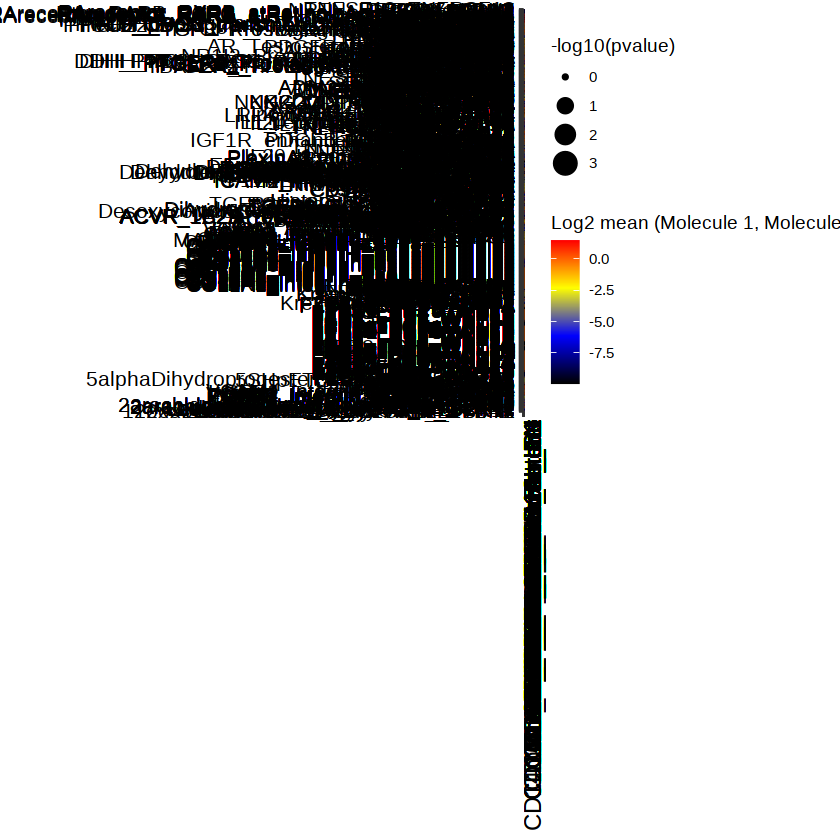

In [29]:
my_palette <- colorRampPalette(c("black", "blue", "yellow", "red"), alpha=TRUE)(n=399)

ggplot(plot.data,aes(x=clusters,y=pair)) +
geom_point(aes(size=-log10(pvalue),color=mean)) +
scale_color_gradientn('Log2 mean (Molecule 1, Molecule 2)', colors=my_palette) +
theme_bw() +
theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        axis.text=element_text(size=14, colour = "black"),
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_text(size=12, colour = "black"),
        axis.title=element_blank(),
        panel.border = element_rect(size = 0.7, linetype = "solid", colour = "black"))

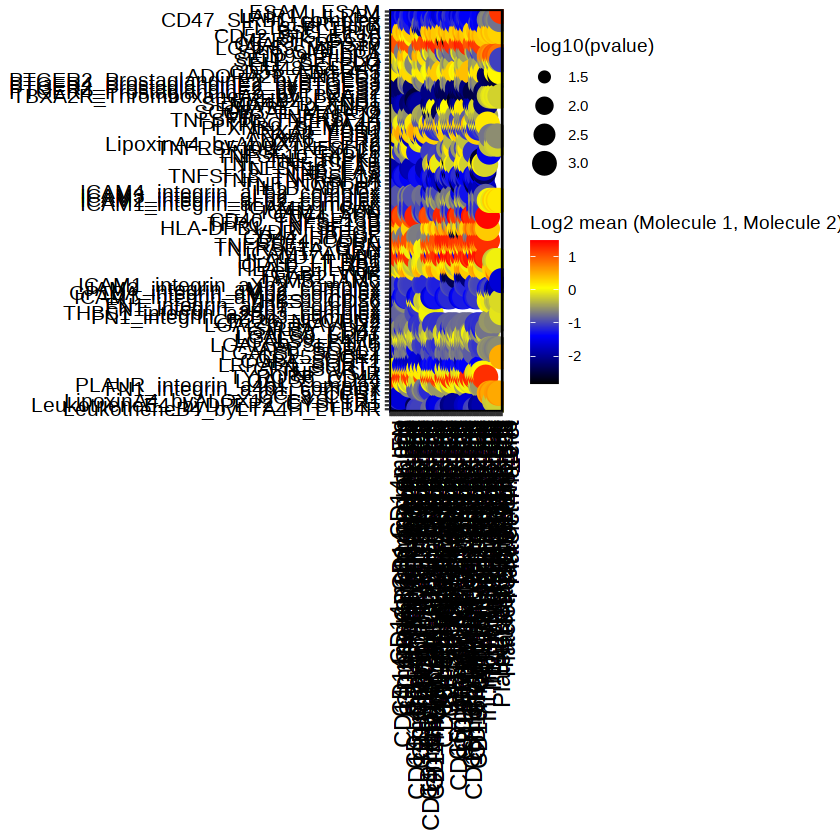

In [30]:
my_palette <- colorRampPalette(c("black", "blue", "yellow", "red"), alpha=TRUE)(n=399)

ggplot(sig_plot.data,aes(x=clusters,y=pair)) +
geom_point(aes(size=-log10(pvalue),color=mean)) +
scale_color_gradientn('Log2 mean (Molecule 1, Molecule 2)', colors=my_palette) +
theme_bw() +
theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        axis.text=element_text(size=14, colour = "black"),
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_text(size=12, colour = "black"),
        axis.title=element_blank(),
        panel.border = element_rect(size = 0.7, linetype = "solid", colour = "black"))

In [31]:
unique(sig_plot.data$clusters)

[1] CD14mono.CD14mono                 CD14mono.CD14mono_IFN            
 [3] CD14mono.CD14mono_alt_act         CD14mono.CD16mono                
 [5] CD14mono.CD16mono_C1              CD14mono.CD16mono_IFN            
 [7] CD14mono.Int.mono                 CD14mono.Platelet                
 [9] CD14mono_IFN.CD14mono             CD14mono_IFN.CD14mono_IFN        
[11] CD14mono_IFN.CD14mono_alt_act     CD14mono_IFN.CD16mono            
[13] CD14mono_IFN.CD16mono_C1          CD14mono_IFN.CD16mono_IFN        
[15] CD14mono_IFN.Int.mono             CD14mono_IFN.Platelet            
[17] CD14mono_alt_act.CD14mono         CD14mono_alt_act.CD14mono_IFN    
[19] CD14mono_alt_act.CD14mono_alt_act CD14mono_alt_act.CD16mono        
[21] CD14mono_alt_act.CD16mono_C1      CD14mono_alt_act.CD16mono_IFN    
[23] CD14mono_alt_act.Int.mono         CD14mono_alt_act.Platelet        
[25] CD16mono.CD14mono                 CD16mono.CD14mono_IFN            
[27] CD16mono.CD14mono_alt_act         CD16mono.CD16mono                
[29] CD16mono.CD16mono_C1              CD16mono.CD16mono_IFN            
[31] CD16mono.Int.mono                 CD16mono.Platelet                
[33] CD16mono_C1.CD14mono              CD16mono_C1.CD14mono_IFN         
[35] CD16mono_C1.CD14mono_alt_act      CD16mono_C1.CD16mono             
[37] CD16mono_C1.CD16mono_C1           CD16mono_C1.CD16mono_IFN         
[39] CD16mono_C1.Int.mono              CD16mono_C1.Platelet             
[41] CD16mono_IFN.CD14mono             CD16mono_IFN.CD14mono_IFN        
[43] CD16mono_IFN.CD14mono_alt_act     CD16mono_IFN.CD16mono            
[45] CD16mono_IFN.CD16mono_C1          CD16mono_IFN.CD16mono_IFN        
[47] CD16mono_IFN.Int.mono             CD16mono_IFN.Platelet            
[49] Int.mono.CD14mono                 Int.mono.CD14mono_IFN            
[51] Int.mono.CD14mono_alt_act         Int.mono.CD16mono                
[53] Int.mono.CD16mono_C1              Int.mono.CD16mono_IFN            
[55] Int.mono.Int.mono                 Int.mono.Platelet                
[57] Platelet.CD14mono                 Platelet.CD14mono_IFN            
[59] Platelet.CD14mono_alt_act         Platelet.CD16mono                
[61] Platelet.CD16mono_C1              Platelet.CD16mono_IFN            
[63] Platelet.Int.mono                 Platelet.Platelet                
64 Levels: CD14mono.CD14mono ... Platelet.Platelet

In [32]:
filtered_sig_plot.data <- sig_plot.data[sig_plot.data$clusters %in% c('CD14mono.Platelet','CD14mono_IFN.Platelet',
                                                                                        'CD14mono_alt_act.Platelet','CD16mono.Platelet',
                                                                                        'CD16mono_IFN.Platelet','CD16mono_C1.Platelet',
                                                                                        'Int.mono.Platelet'),]

In [33]:
dim(filtered_sig_plot.data)

[1] 68  4

In [34]:
unique(filtered_sig_plot.data$clusters)

[1] CD14mono.Platelet         CD14mono_IFN.Platelet    
[3] CD14mono_alt_act.Platelet CD16mono.Platelet        
[5] CD16mono_C1.Platelet      CD16mono_IFN.Platelet    
[7] Int.mono.Platelet        
64 Levels: CD14mono.CD14mono ... Platelet.Platelet

In [35]:
head(filtered_sig_plot.data)

,pair,clusters,pvalue,mean
,<fct>,<fct>,<dbl>,<dbl>
CD14mono.Platelet79,GRN_SORT1,CD14mono.Platelet,9e-04,-0.01158797
CD14mono.Platelet401,LGALS9_CD47,CD14mono.Platelet,9e-04,-0.32192809
CD14mono.Platelet402,SIRPA_CD47,CD14mono.Platelet,9e-04,-0.57346686
CD14mono.Platelet555,THBS1_integrin_a2Bb3_complex,CD14mono.Platelet,9e-04,-0.83650127
CD14mono.Platelet742,CD74_COPA,CD14mono.Platelet,9e-04,1.02715405
CD14mono.Platelet753,CD74_APP,CD14mono.Platelet,9e-04,1.29219277


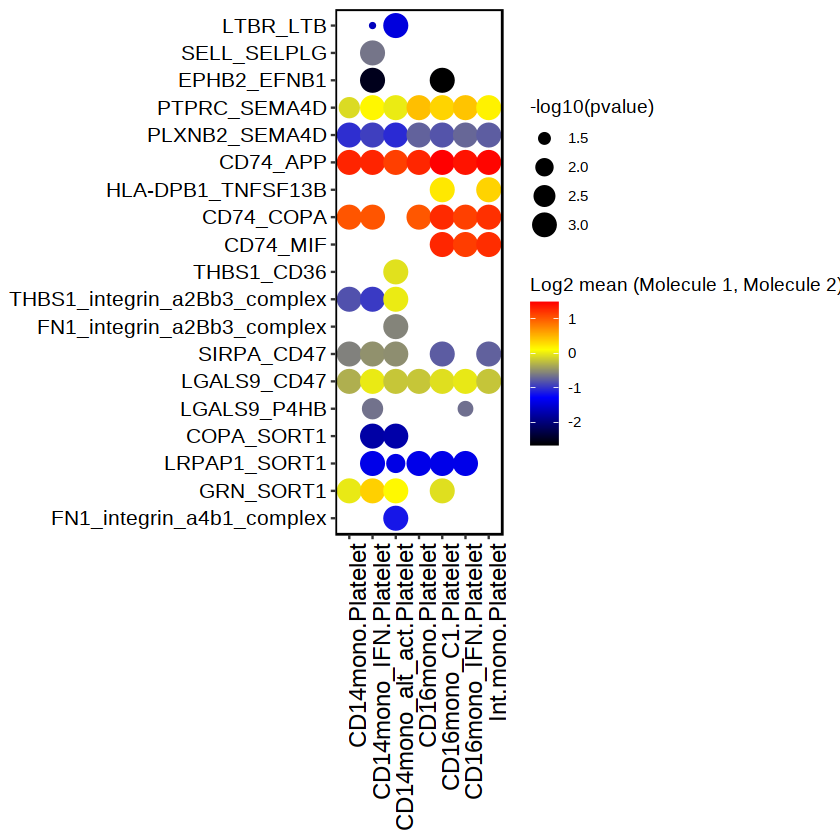

In [36]:
my_palette <- colorRampPalette(c("black", "blue", "yellow", "red"), alpha=TRUE)(n=399)

ggplot(filtered_sig_plot.data,aes(x=clusters,y=pair)) +
geom_point(aes(size=-log10(pvalue),color=mean)) +
scale_color_gradientn('Log2 mean (Molecule 1, Molecule 2)', colors=my_palette) +
theme_bw() +
theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        axis.text=element_text(size=14, colour = "black"),
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_text(size=12, colour = "black"),
        axis.title=element_blank(),
        panel.border = element_rect(size = 0.7, linetype = "solid", colour = "black"))

In [37]:
ggsave(paste0(path,'filtered_plot.pdf'), width = 8, height = 8, device = cairo_pdf, limitsize=F)

In [ ]:
ggplot(filtered_sig_plot.data, aes(clusters, pair, fill= mean)) + 
  geom_tile()